In [85]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt
import statistics
import scipy as scipy
import scipy.stats as stats
import seaborn as sns

## <b>Data Cleansing</b>

In [86]:
nyc_rolling_sales = pandas.read_csv("dataset/nyc-rolling-sales.csv")
nyc_rolling_sales.drop(columns=["Unnamed: 0","EASE-MENT"], inplace=True)
nyc_rolling_sales.drop_duplicates(inplace=True) #Sintax untuk menangani data duplikat
nyc_rolling_sales.describe()
nyc_rolling_sales.shape

(83783, 20)

------------
Terdapat beberapa data yang bisa dianggap sebagai data yang salah atau dapat juga dianggap sebagai outliner, antara lain:
- Data dengan ZipCode 0
- Data dengan tahun pembuatan 0
- Data rumah dengan tahun pembuatan dibawah 1800
- Data luas lahan rumah 0

In [87]:
#Mengubah angka dengan tipe data "string" pada kolom ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
#Mengubah isi kolom dalam variabel categ dari bentuk object menjadi bentuk category
#mengubah isi kolom ["SALE DATE"] dari bentuk string menjadi tipe datetime

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer:
    nyc_rolling_sales[col] = pandas.to_numeric(nyc_rolling_sales[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    nyc_rolling_sales[col] = nyc_rolling_sales[col].astype('category')
    
nyc_rolling_sales['SALE DATE'] = pandas.to_datetime(nyc_rolling_sales['SALE DATE'], errors='coerce')

In [88]:
#Untuk membersihkan data, maka dilakukan dengan menggunakan variabel cond 
cond = ((nyc_rolling_sales["YEAR BUILT"] > 1800) & 
        (nyc_rolling_sales["ZIP CODE"] != 0) & 
        (nyc_rolling_sales["RESIDENTIAL UNITS"] < 200) & 
        (nyc_rolling_sales["COMMERCIAL UNITS"] < 200) & 
        (nyc_rolling_sales["GROSS SQUARE FEET"] != 0) & 
        (nyc_rolling_sales["LAND SQUARE FEET"] != 0) & 
        (nyc_rolling_sales["SALE PRICE"] > 10000))
nyc_rolling_sales = nyc_rolling_sales.loc[cond, :]

In [89]:
nyc_rolling_sales.fillna(method='ffill' , inplace=True)
# nyc_rolling_sales.describe()
nyc_rolling_sales["APARTMENT NUMBER"]
nyc_rolling_sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,47300.000000,47300.000000,47300.000000,47300.000000,47300.000000,47300.000000,47300.000000,4.730000e+04,4.730000e+04,47300.000000,4.730000e+04
mean,2.999979,4307.507505,282.322516,10796.233975,1.664863,0.117674,1.788858,8.015177e+03,2.628629e+04,1948.315201,1.557619e+06
std,1.408634,3696.674564,571.247718,593.900164,5.592782,1.481337,5.838569,2.549765e+04,6.614408e+04,32.733179,1.309961e+07
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,1.680000e+02,1.200000e+02,1835.000000,1.000100e+04
25%,1.000000,1336.000000,19.000000,10075.000000,0.000000,0.000000,1.000000,2.214000e+03,1.660000e+03,1925.000000,4.050000e+05
50%,3.000000,3300.500000,43.000000,11204.000000,1.000000,0.000000,1.000000,3.148000e+03,2.880000e+03,1941.000000,6.450000e+05
75%,4.000000,6396.000000,118.000000,11365.000000,2.000000,0.000000,2.000000,5.310000e+03,1.580000e+04,1965.000000,1.100000e+06
max,5.000000,16319.000000,9002.000000,11694.000000,198.000000,172.000000,198.000000,3.014056e+06,1.617206e+06,2017.000000,2.210000e+09


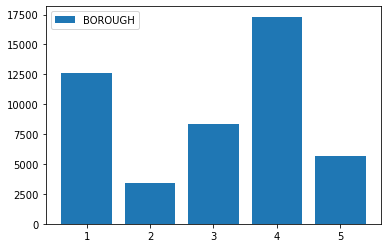

In [90]:
#menghitung jumlah rumah pada masing-masing distrik ["BOROUGH"]
srs_borough = nyc_rolling_sales.loc[:,"BOROUGH"]
axis_x = srs_borough.value_counts()
plt.bar(axis_x.index, axis_x.values, label="BOROUGH")
plt.legend()

## <b>Central Tendency</b>

Pada case ini kita akan menggunakan data pada column ["BOROUGH"] untuk mencari data Central Tendency rerata, modus, dan median

In [91]:
#Melihat Central tendency pada Series ["BOROUGH"]
print("Central Tendency [\"BOROUGH\"] dengan menggunakan rata-rata (mean)       : ", srs_borough.mean())
print("Central Tendency [\"BOROUGH\"] dengan menggunakan modus (mode)           : ", stats.mode(srs_borough).mode[0])
print("Central Tendency [\"BOROUGH\"] dengan menggunakan nilai tengah (median)  : ", srs_borough.median())

Central Tendency ["BOROUGH"] dengan menggunakan rata-rata (mean)       :  2.9999788583509512
Central Tendency ["BOROUGH"] dengan menggunakan modus (mode)           :  4
Central Tendency ["BOROUGH"] dengan menggunakan nilai tengah (median)  :  3.0


## <b>Measure of Spread / Dispersion</b>

Measure of spread yang akan kita gunakan untuk menganalisa Column ["BOROUGH"] adalah range, Variance dan Standart Deviation
- range : Selisih dari nilai terbesar dan terkecil pada sautu data.
- Standart Deviasi : Standard deviation/Simpangan baku adalah pengukuran jarak rata-rata antara setiap besaran dan mean.
- Variance : Variance adalah kuadrat dari standar deviasi

In [92]:
print("Measure of Spread (Range) : ", numpy.ptp(srs_borough))
print("Measure of Spread (Standart Deviasi) : ", statistics.pstdev(srs_borough))
print("Measure of Spread (Variance) : ", statistics.pvariance(srs_borough))

Measure of Spread (Range) :  4
Measure of Spread (Standart Deviasi) :  1.4086188937089077
Measure of Spread (Variance) :  1.9842071877137073


In [93]:
print("Penghitungan skew dari Column [\"BOROUGH\"] : ", stats.skew(srs_borough)) #-0.31611244012399115

Penghitungan skew dari Column ["BOROUGH"] :  -0.31611244012399115


> Hasil dari perhitungan nilai skew Column [\"BOROUGH\"] menunjukkan nilai negatif yang berarti skew yang dihasilkan oleh data ini adalah jenis <b> skew negative </b>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

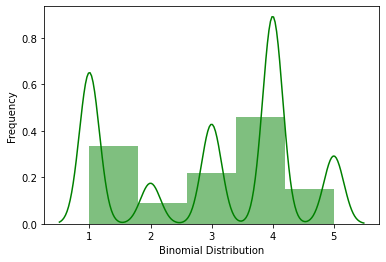

In [121]:
ax = sns.distplot(x = srs_borough.values,
                    bins=5,
                    kde=True,
                    color='green',
                    hist_kws={'linewidth':15, 'alpha':.5})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

In [108]:
# Menghitung data penjualan rumah dengan tahun pembuatan <2000
cond = (nyc_rolling_sales["YEAR BUILT"] >= 1900) & (nyc_rolling_sales["YEAR BUILT"] < 2000) & (nyc_rolling_sales["SALE PRICE"] < 1.410052e+06)
sales_yb19 = nyc_rolling_sales.loc[cond, "YEAR BUILT"]
sales_price19 = nyc_rolling_sales.loc[cond, "SALE PRICE"]

# Menghitung data penjualan rumah dengan tahun pembuatan >=2000
cond = (nyc_rolling_sales["YEAR BUILT"] >= 2000) & (nyc_rolling_sales["SALE PRICE"] < 6.236678e+06)
sales_yb20 = nyc_rolling_sales.loc[cond, "YEAR BUILT"]
sales_price20 = nyc_rolling_sales.loc[cond, "SALE PRICE"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

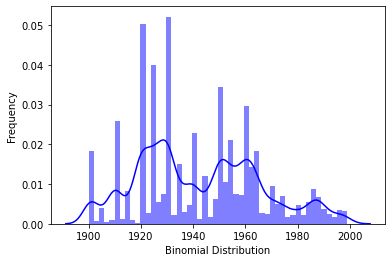

In [117]:
ax = sns.distplot(x = sales_yb19.values,
                    bins=50,
                    kde=True,
                    color='blue',
                    hist_kws={'linewidth':15, 'alpha':.5})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

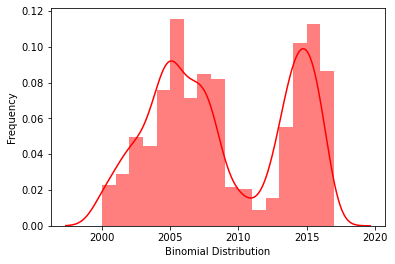

In [115]:
ax = sns.distplot(x = sales_yb20.values,
                    bins=(sales_yb20.max() - sales_yb20.min()),
                    kde=True,
                    color='red',
                    hist_kws={'linewidth':15, 'alpha':.5})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

In [114]:
sales_yb20.max() - sales_yb20.min()

17

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

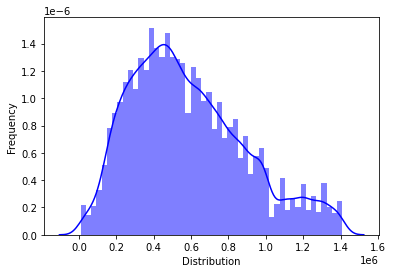

In [137]:
ax = sns.distplot(x = sales_price19.values,
                    bins=50,
                    kde=True,
                    color='blue',
                    hist_kws={'linewidth':15, 'alpha':.5})
ax.set(xlabel='Distribution', ylabel='Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

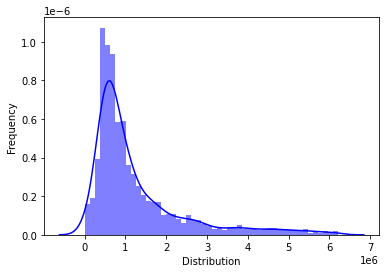

In [136]:
ax = sns.distplot(x = sales_price20.values,
                    bins=50,
                    kde=True,
                    color='blue',
                    hist_kws={'linewidth':15, 'alpha':.5})
ax.set(xlabel='Distribution', ylabel='Frequency')

In [123]:
sales_price19.mean()

583901.2435426523

## <b>Hypothesis Statement</b>

H0 : suatu asosiasi broker menyatakan bahwa rata-rata penjualan rumah di london pada tahun 2019 kurang dari $580.000 <br>
H1 : Penjualan rumah di london pada tahun 2019 > $580.000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

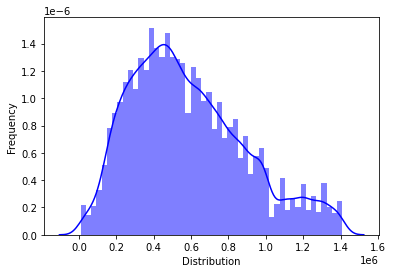

In [138]:
ax = sns.distplot(x = sales_price19.values,
                    bins=50,
                    kde=True,
                    color='blue',
                    hist_kws={'linewidth':15, 'alpha':.5})
ax.set(xlabel='Distribution', ylabel='Frequency')

>menetukan variabel untuk menguji hipotesis  <br>
>hyp_mean = rata-rata dari sample yang diuji <br>
>hyp_n = banyaknya data sample <br>
>hyp_sdev = simpangan baku <br>
>hyp_z95 = 1.96 untuk mendapatkan cofident level 95% <br>
>hyp_z97 = 2.17 untuk mendapatkan cofident level 97% <br>
>hyp_z99 = 3.29 untuk mendapatkan cofident level 99.9%

In [182]:
hyp_mean = sales_price19.mean() #583901
hyp_n = sales_price19.count() #34031
hyp_stdev = statistics.stdev(sales_price19) #307361
hyp_z95 = -1.96
hyp_z97 = -2.17
hyp_z99 = -3.29

In [184]:
z_res = (hyp_mean - 600000)/(hyp_stdev/numpy.sqrt(hyp_n))
z_res #-9.662286189067018

-9.662286189067018

dikarenakan nilai z_res adalah <b>-9.6</b>, maka dapat dipastikan bahwa rata-rata harga penjualan rumah pada tahun pembuatan abad 19 adalah kurang dari <b> $600000 </b>dengan tingkat kepastian sebesar 99.9%. <br> <br>
dapat disimpulkan bahwa sudah cukup untuk mengatakan bahwa rata-rata harga penjualan rumah yang dibangun pada abad 19 adalah kurang dari <b>$600000</b>